In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import nltk
import re
from wordcloud import wordcloud

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM, Conv1D, MaxPool1D
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

In [ ]:
data = pd.read_csv('drive/MyDrive/fake_job_postings.csv')

In [ ]:
data.head()

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


In [ ]:
columns=['job_id', 'telecommuting', 'has_company_logo', 'has_questions', 'salary_range', 'employment_type']
for col in columns:
    del data[col]

data.fillna(' ', inplace=True)

In [ ]:
data['content']=data['title']+' '+data['company_profile']+' '+data['description']+' '+data['requirements']+' '+data['benefits']
del data['title']
del data['location']
del data['department']
del data['company_profile']
del data['description']
del data['requirements']
del data['benefits']
del data['required_experience']
del data['required_education']
del data['industry']
del data['function']

In [ ]:
data.head()

,fraudulent,content
0,0,"Marketing Intern We're Food52, and we've creat..."
1,0,Customer Service - Cloud Video Production 90 S...
2,0,Commissioning Machinery Assistant (CMA) Valor ...
3,0,Account Executive - Washington DC Our passion ...
4,0,Bill Review Manager SpotSource Solutions LLC i...


In [ ]:
import seaborn as sns

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


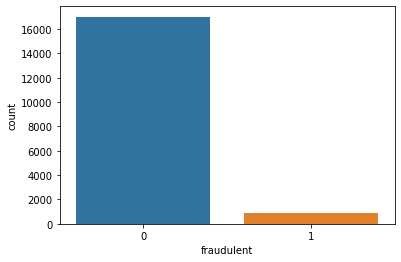

In [ ]:
sns.countplot('fraudulent', data=data)

In [ ]:
data['fraudulent'].value_counts()

0    17014
1      866
Name: fraudulent, dtype: int64

In [ ]:
import string

def remove_punct(content):
  translator = str.maketrans("", "", string.punctuation)
  return content.translate(translator)

In [ ]:
data['content'] = data.content.map(remove_punct)

In [ ]:
data.head()

,fraudulent,content
0,0,Marketing Intern Were Food52 and weve created ...
1,0,Customer Service Cloud Video Production 90 Se...
2,0,Commissioning Machinery Assistant CMA Valor Se...
3,0,Account Executive Washington DC Our passion f...
4,0,Bill Review Manager SpotSource Solutions LLC i...


In [ ]:
nltk.download('stopwords')
from nltk.corpus import stopwords

stop = set(stopwords.words("english"))

def remove_stopwords(content):
  filtered_words = [word.lower() for word in content.split() if word.lower() not in stop]
  return " ".join(filtered_words)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
data['content'] = data.content.map(remove_stopwords)

In [ ]:
data.head()

,fraudulent,content
0,0,marketing intern food52 weve created groundbre...
1,0,customer service cloud video production 90 sec...
2,0,commissioning machinery assistant cma valor se...
3,0,account executive washington dc passion improv...
4,0,bill review manager spotsource solutions llc g...


In [ ]:
import gensim

In [ ]:
y = data['fraudulent'].values

In [ ]:
x = [d.split() for d in data['content'].tolist()]

In [ ]:
type(x[0])

list

In [ ]:
print(x[0])

['marketing', 'intern', 'food52', 'weve', 'created', 'groundbreaking', 'awardwinning', 'cooking', 'site', 'support', 'connect', 'celebrate', 'home', 'cooks', 'give', 'everything', 'need', 'one', 'placewe', 'top', 'editorial', 'business', 'engineering', 'team', 'focused', 'using', 'technology', 'find', 'new', 'better', 'ways', 'connect', 'people', 'around', 'specific', 'food', 'interests', 'offer', 'superb', 'highly', 'curated', 'information', 'food', 'cooking', 'attract', 'talented', 'home', 'cooks', 'contributors', 'country', 'also', 'publish', 'wellknown', 'professionals', 'like', 'mario', 'batali', 'gwyneth', 'paltrow', 'danny', 'meyer', 'partnerships', 'whole', 'foods', 'market', 'random', 'housefood52', 'named', 'best', 'food', 'website', 'james', 'beard', 'foundation', 'iacp', 'featured', 'new', 'york', 'times', 'npr', 'pando', 'daily', 'techcrunch', 'today', 'showwere', 'located', 'chelsea', 'new', 'york', 'city', 'food52', 'fastgrowing', 'james', 'beard', 'awardwinning', 'onlin

In [ ]:
DIM = 100
w2v_model = gensim.models.Word2Vec(sentences=x, size=DIM, window=10, min_count=1)

In [ ]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(x)

In [ ]:
x = tokenizer.texts_to_sequences(x)

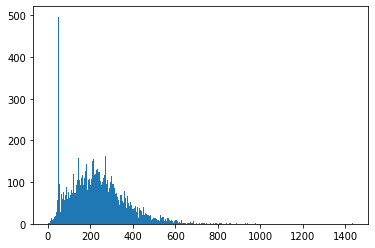

In [ ]:
plt.hist([len(X) for X in x], bins = 700) 
plt.show()

In [ ]:
nos = np.array([len(X) for X in x])
len(nos[nos>500])

712

In [ ]:
maxlen = 500
x = pad_sequences(x, maxlen=maxlen)

In [ ]:
len(x[101])

500

In [ ]:
vocab_size = len(tokenizer.word_index) + 1
vocab = tokenizer.word_index

In [ ]:
def get_weight_matrix(model):
  weight_matrix = np.zeros((vocab_size, DIM))

  for word, i in vocab.items():
    weight_matrix[i] = model.wv[word]

  return weight_matrix

In [ ]:
embedding_vectors = get_weight_matrix(w2v_model)

In [ ]:
from tensorflow.keras import layers
from keras.layers import Dense
from keras.layers import Dropout

model_lstm = keras.models.Sequential()
model_lstm.add(tf.keras.layers.Embedding(vocab_size, output_dim=DIM, weights =[embedding_vectors], input_length=maxlen, trainable=False))
model_lstm.add(tf.keras.layers.LSTM(
    units = 128,
    activation='tanh',
    recurrent_activation='sigmoid',
    use_bias=True,
    kernel_initializer='glorot_uniform',
    recurrent_initializer='orthogonal',
    bias_initializer='zeros',
    unit_forget_bias=True,
    kernel_regularizer=None,
    recurrent_regularizer=None,
    bias_regularizer=None,
    activity_regularizer=None,
    kernel_constraint=None,
    recurrent_constraint=None,
    bias_constraint=None,
    dropout=0.0,
    recurrent_dropout=0.0,
    return_sequences=False,
    return_state=False,
    go_backwards=False,
    stateful=False,
    time_major=False,
    unroll=False,
))
model_lstm.add(tf.keras.layers.Dense(1, activation="sigmoid"))
model_lstm.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
model_lstm.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 500, 100)          17268000  
                                                                 
 lstm_1 (LSTM)               (None, 128)               117248    
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                                 
Total params: 17,385,377
Trainable params: 117,377
Non-trainable params: 17,268,000
_________________________________________________________________


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y)

In [ ]:
model_lstm.fit(x_train, y_train, validation_split=0.3, epochs=30)

Epoch 1/30
294/294 [==============================] - 12s 34ms/step - loss: 0.1692 - acc: 0.9536 - val_loss: 0.1348 - val_acc: 0.9630
Epoch 2/30
294/294 [==============================] - 9s 31ms/step - loss: 0.0969 - acc: 0.9713 - val_loss: 0.1192 - val_acc: 0.9667
Epoch 3/30
294/294 [==============================] - 9s 30ms/step - loss: 0.0644 - acc: 0.9799 - val_loss: 0.1027 - val_acc: 0.9717
Epoch 4/30
294/294 [==============================] - 9s 30ms/step - loss: 0.0385 - acc: 0.9876 - val_loss: 0.1139 - val_acc: 0.9766
Epoch 5/30
294/294 [==============================] - 9s 30ms/step - loss: 0.0209 - acc: 0.9939 - val_loss: 0.1221 - val_acc: 0.9769
Epoch 6/30
294/294 [==============================] - 9s 30ms/step - loss: 0.0115 - acc: 0.9971 - val_loss: 0.1190 - val_acc: 0.9756
Epoch 7/30
294/294 [==============================] - 9s 30ms/step - loss: 0.0149 - acc: 0.9956 - val_loss: 0.1359 - val_acc: 0.9759
Epoch 8/30
294/294 [==============================] - 9s 30ms/step -

In [ ]:
y_pred = (model_lstm.predict(x_test) >=0.5).astype(int)

In [ ]:
accuracy_score(y_test, y_pred)

0.9753914988814317

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      4235
           1       0.95      0.56      0.71       235

    accuracy                           0.98      4470
   macro avg       0.96      0.78      0.85      4470
weighted avg       0.97      0.98      0.97      4470



In [ ]:
n = ['tokomedia is delighted to offer you the full-time position of software engineer with an anticipated start date of januari 13, contingent upon drug screening']

In [ ]:
n = tokenizer.texts_to_sequences(n)
n = pad_sequences(n, maxlen=maxlen)

In [ ]:
(model_lstm.predict(n) >=0.5).astype(int)

array([[0]])

In [ ]:
from json import JSONEncoder
import numpy

class NumpyArrayEncoder(JSONEncoder):
    def default(self, obj):
        if isinstance(obj, numpy.ndarray):
            return obj.tolist()
        return JSONEncoder.default(self, obj)

In [ ]:
import json

last = json.dumps(n, cls=NumpyArrayEncoder)
if last == "[[1]]":
  last = "1"
else: 
  last = "0"

jsonoutput = {
    "Prediction" : last
}

In [ ]:
dump = json.dumps(jsonoutput)

In [ ]:
dump

'{"Prediction": "0"}'

In [ ]:
model_lstm.save('drive/MyDrive/model.h5')

In [ ]:
new_model = tf.keras.models.load_model('drive/MyDrive/model.h5')

In [ ]:
import pickle

# saving
with open('drive/MyDrive/tokenizer.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)